<a href="https://colab.research.google.com/github/kavyajeetbora/ML_algorithms/blob/master/clustering/Clustering%20of%20POIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install --quiet duckdb
!pip install --quiet jupysql
!pip install --quiet duckdb-engine
!pip install --quiet pandas
!pip install --quiet matplotlib
!pip install -q pydeck

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.8/192.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 42.4 MB/s eta 0:00:00


In [13]:
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from matplotlib import pyplot
from tqdm import tqdm
import pydeck as pdk
import shapely
import duckdb
import os
import time
import warnings
import requests
from lxml import etree

In [29]:
!wget -q https://github.com/kavyajeetbora/metro_accessibility/raw/master/data/delhi/Delhi_NCR_station_nodes.gpkg -O station_nodes.gpkg
station_nodes = gpd.read_file('station_nodes.gpkg', crs='EPSG:4236')
station_nodes = station_nodes.to_crs('EPSG:32643')
print("Total Number of stations:",station_nodes.shape[0])
station_nodes.sample(4)

Total Number of stations: 262


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver GPKG does not support open option CRS
  return ogr_read(


,name,railway,network,operator,source,geometry
156,Nehru Place,stop,Delhi Metro,Delhi Metro Rail Corporation Limited,openstreetmaps,POINT (720281.877 3160369.37)
223,Mohan Nagar,station,Delhi Metro,Delhi Metro Rail Corporation Limited,openstreetmaps,POINT (732993.846 3174677.067)
135,Surajmal Stadium,None,Delhi Metro,Delhi Metro Rail Corporation Limited,openstreetmaps,POINT (702685.358 3174493.708)
13,Noida Sector 147,station,Noida Metro,NR,openstreetmaps,POINT (741474.731 3150562.462)


<Axes: >

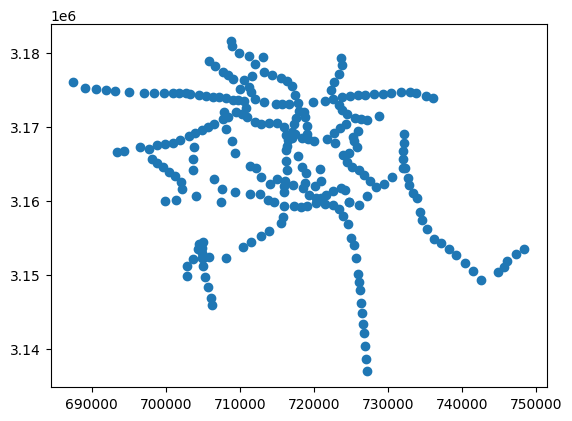

In [34]:
station_nodes.plot()

In [43]:
X = np.array(list(zip(station_nodes.geometry.x, station_nodes.geometry.y)))

In [55]:
model = DBSCAN(eps=1000, min_samples=3)
y_hat = model.fit_predict(X)
y_hat

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1, -1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, 14, -1, -1,  2,  2,  2,  2, -1, -1,  3,  3,  3, -1, -1, -1, -1,
       -1, -1, -1, -1,  4,  4, -1, -1, -1, -1, -1, -1, -1, -1,  5,  5,  5,
       -1, -1, -1, -1, -1, -1, -1,  6,  6,  6,  7,  7,  8,  8,  8, -1, -1,
       -1, -1, -1,  2,  9,  9,  9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, 10, 10, 10, -1,  2, -1, -1, -1, -1, -1, 11, 11, 11,
       11, -1, 12, 12, 12, 13, 13, 13,  8, 14, 14, -1,  9,  2, -1, -1, -1,
       -1, -1, -1, 15, 15, 15, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, 15, -1, -1, -1, -1, -1, -1, -1, -1, -1, 13,  7, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 15, 16, 16, 16, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [56]:
df_out = pd.DataFrame({"lon": X[:,0], "lat": X[:,1], "class": y_hat})
df_out.sample(5)

,lon,lat,class
154,718552.862192,3.161735e+06,-1
119,730478.155682,3.163161e+06,-1
78,702182.323449,3.161609e+06,-1
188,709287.106998,3.166501e+06,-1
250,724716.905389,3.159897e+06,-1


<Axes: xlabel='lon', ylabel='lat'>

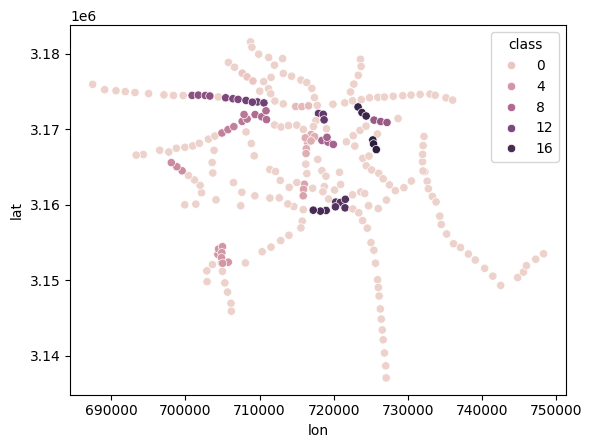

In [57]:
import seaborn as sns
sns.scatterplot(data=df_out, x='lon', y='lat', hue='class')